## US Visa Prediction Project: Machine Learning Life Cycle

### Project Life Cycle Stages

1. **Understanding the Problem Statement**
2. **Data Collection**
3. **Exploratory Data Analysis (EDA)**
4. **Data Cleaning**
5. **Data Pre-Processing**
6. **Model Training**
7. **Selecting the Best Model**

---

### Project Overview

The United States Immigration and Nationality Act (INA) permits the employment of foreign workers in the U.S. on a temporary or permanent basis, while safeguarding the interests of domestic workers and establishing requirements for hiring foreign employees. The Office of Foreign Labor Certification (OFLC) is responsible for administering these immigration programs.

With a substantial increase in visa applications last year, the OFLC seeks to utilize machine learning to streamline the process by predicting visa application outcomes based on historical data. This project aims to build a classification model to determine if a visa application should be approved or denied based on specific influencing factors. The model will assist in identifying applicants likely to meet visa certification requirements.

### Steps

1. **Problem Statement**: 
   The OFLC issues job certifications for employers bringing foreign workers to the U.S. Due to the high volume of applications, the OFLC needs a machine learning model to assist in shortlisting visa applicants based on historical data.

2. **Data Collection**: 
   - The dataset for this project comes from the OFLC, containing **25,480 rows** and **12 columns**.
   - Source: [OFLC Visa Dataset on Kaggle](https://www.kaggle.com/datasets/moro23/easyvisa-dataset)

This workflow will guide us through developing an efficient classification model for visa approval prediction based on the provided data, ultimately aiding the OFLC in prioritizing suitable visa applications.

2.1 **Data Import and Required Packages**:
   - Import the necessary libraries: `Pandas`, `NumPy`, `Matplotlib`, `Seaborn`, and the `warnings` library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("EasyVisa.csv")

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.shape

(25480, 12)

In [5]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3. Exploring Data

In [7]:
# Separate columns into numerical and categorical based on data type
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Display results
print(f'There are {len(numeric_features)} numerical features: {numeric_features}')
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')


There are 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
There are 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
# Display proportion of count data for each categorical column
for col in categorical_features:
    print(f"Proportion of counts for '{col}':")
    print(df[col].value_counts(normalize=True).mul(100).round(5))
    print('-' * 30)


Proportion of counts for 'case_id':
case_id
EZYV01       0.00392
EZYV16995    0.00392
EZYV16993    0.00392
EZYV16992    0.00392
EZYV16991    0.00392
              ...   
EZYV8492     0.00392
EZYV8491     0.00392
EZYV8490     0.00392
EZYV8489     0.00392
EZYV25480    0.00392
Name: proportion, Length: 25480, dtype: float64
------------------------------
Proportion of counts for 'continent':
continent
Asia             66.17347
Europe           14.64678
North America    12.91994
South America     3.34380
Africa            2.16248
Oceania           0.75353
Name: proportion, dtype: float64
------------------------------
Proportion of counts for 'education_of_employee':
education_of_employee
Bachelor's     40.16484
Master's       37.81005
High School    13.42229
Doctorate       8.60283
Name: proportion, dtype: float64
------------------------------
Proportion of counts for 'has_job_experience':
has_job_experience
Y    58.09262
N    41.90738
Name: proportion, dtype: float64
-------------------

### Insights

- **case_id Column**: The `case_id` column contains unique values for each record and does not add significant analytical value. This column can be safely dropped from the dataset.
- **Continent Column**: The `continent` column shows a strong bias towards Asia. To improve model performance, other categories can be merged into a single "Other" category to reduce skewness.
- **unit_of_wage Column**: The `unit_of_wage` column holds valuable information as it indicates that most contracts are yearly, suggesting this variable could be a strong predictor.

## Types of Data Analysis

- **Univariate Analysis**: This is the analysis of a single variable to understand its distribution, characteristics, and structure. The prefix “uni” refers to "one," indicating a single-variable focus.
- **Bivariate Analysis**: This approach examines the relationship between two variables to assess potential correlations or dependencies.
- **Multivariate Analysis**: This involves analyzing more than two variables simultaneously to identify complex relationships and interactions among multiple factors. 

Each type of analysis provides unique insights, contributing to a comprehensive understanding of the dataset.

**Numerical Features**

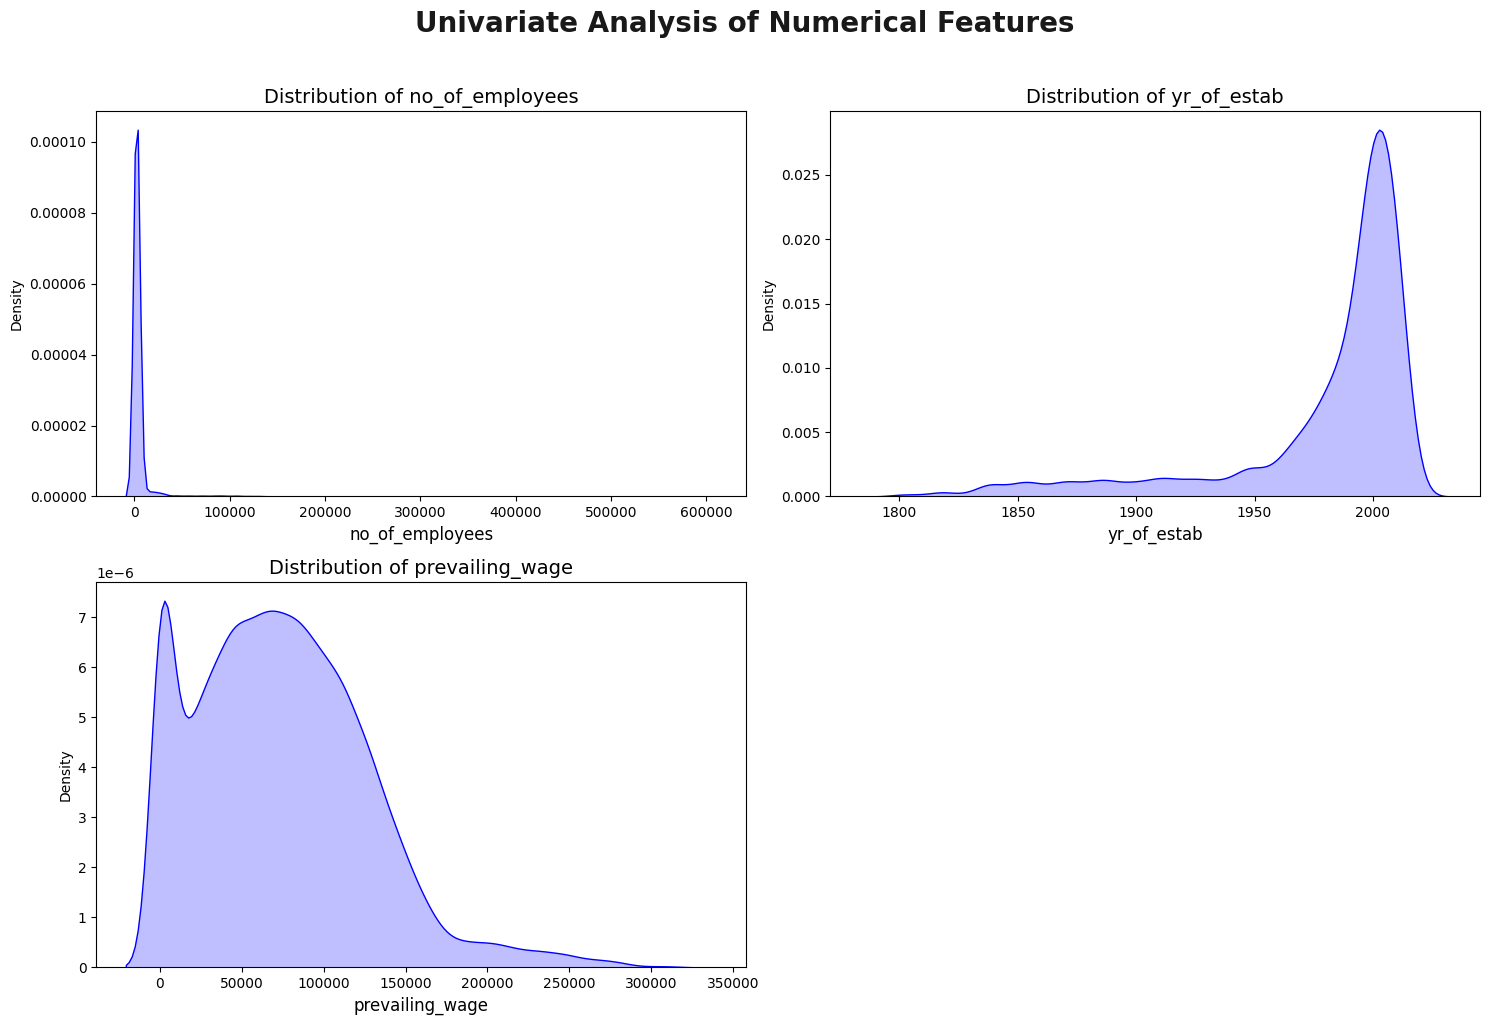

In [9]:
# Set up figure for univariate analysis of numerical features
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.02)

# Iterate over numerical features to create KDE plots
for idx, feature in enumerate(numeric_features, start=1):
    plt.subplot(2, 2, idx)
    sns.kdeplot(data=df, x=feature, color='blue', fill=True)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.tight_layout()

# Optional: save plot
# plt.savefig('./images/Univariate_Num.png', bbox_inches='tight')


## Insights

- **no_of_employees Column**: The `no_of_employees` column appears highly skewed, likely due to the presence of outliers. Further investigation or outlier handling may be required to improve data quality.
- **yr_of_estab Column**: The `yr_of_estab` column is a discrete feature, representing the year of establishment, and may influence the prediction depending on the variable's relationship with other features.
- **prevailing_wage Column**: The `prevailing_wage` column shows a right-skewed distribution, indicating that most wages are on the lower end with a few high-value outliers. Transformation techniques could be applied to reduce skewness for better model performance.

These insights provide direction for data pre-processing steps, such as outlier handling and feature transformation, to improve model accuracy and interpretability.

**Categorical Features**

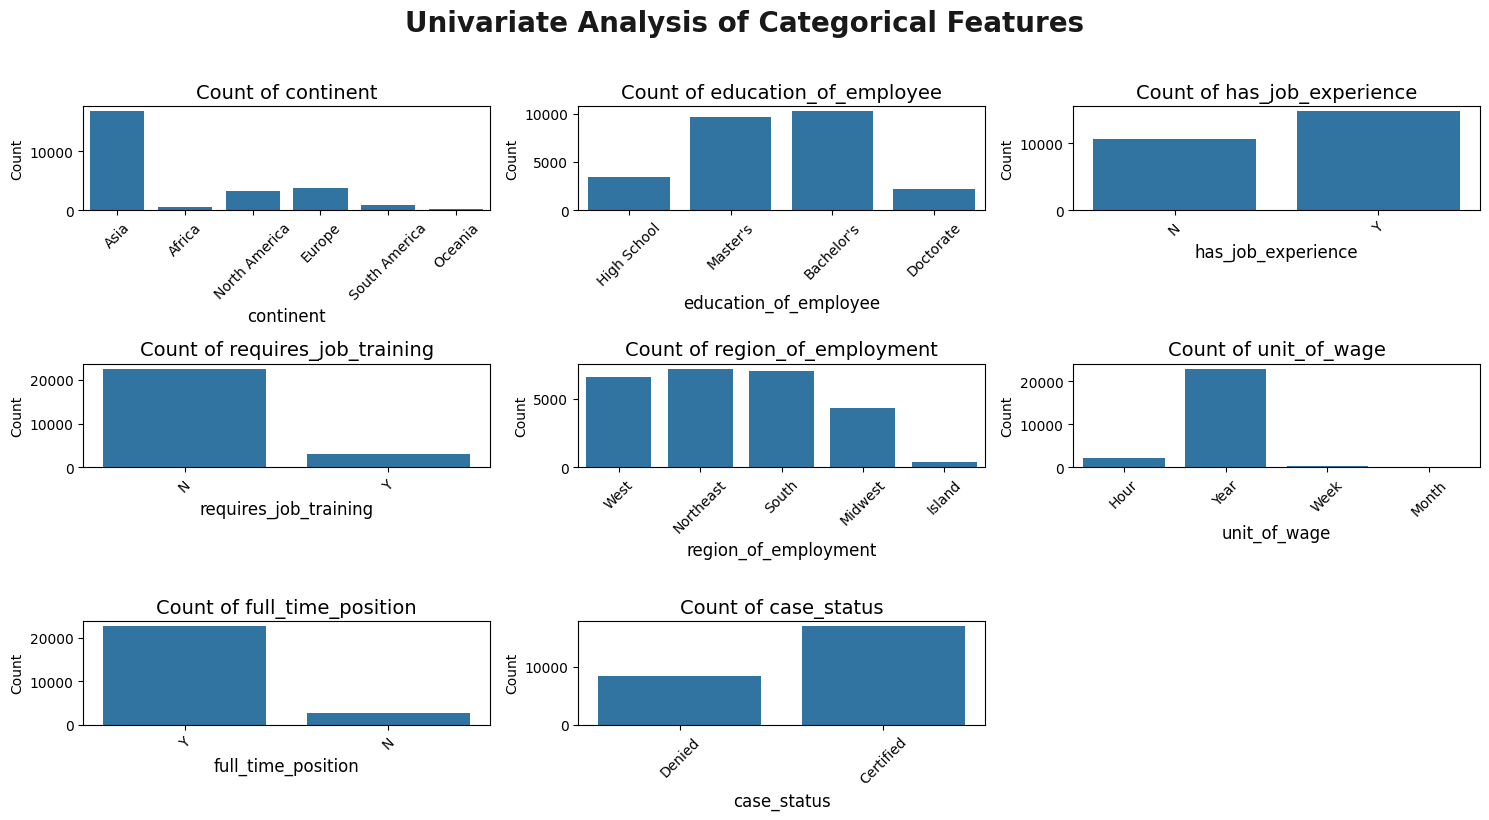

In [10]:
# Remove 'case_id' from categorical features as it's not relevant for analysis
categorical_features = [feature for feature in categorical_features if feature != 'case_id']

# Set up figure for univariate analysis of categorical features
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.02)

# Iterate over categorical features to create count plots
for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count')
    plt.title(f'Count of {feature}', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability if needed
    plt.tight_layout()

# Optional: save plot
# plt.savefig('./images/Univariate_Cat.png', bbox_inches='tight')


## Insights

- **Dominant Categories**: The columns `requires_job_training`, `unit_of_wage`, `full_time_position`, and `continent` have a single category that dominates the distribution, indicating potential skewness. This may reduce the predictive power of these features, as there is limited variability.
- **Balanced Columns**: The remaining categorical columns are more balanced, with multiple categories fairly represented. These balanced distributions may provide stronger signals and contribute more effectively to the model's predictions.

This information helps prioritize features that may need balancing techniques or adjustments to enhance their contribution to the model.

## Multivariate Analysis
 * Multivariate analysis is the analysis of more than one variable.

In [11]:
# Categorize numerical features into discrete and continuous based on unique value counts
discrete_features = [feature for feature in numeric_features if df[feature].nunique() <= 25]
continuous_features = [feature for feature in numeric_features if df[feature].nunique() > 25]

# Display counts and lists of features
print(f'There are {len(discrete_features)} discrete features: {discrete_features}')
print(f'There are {len(continuous_features)} continuous features: {continuous_features}')


There are 0 discrete features: []
There are 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


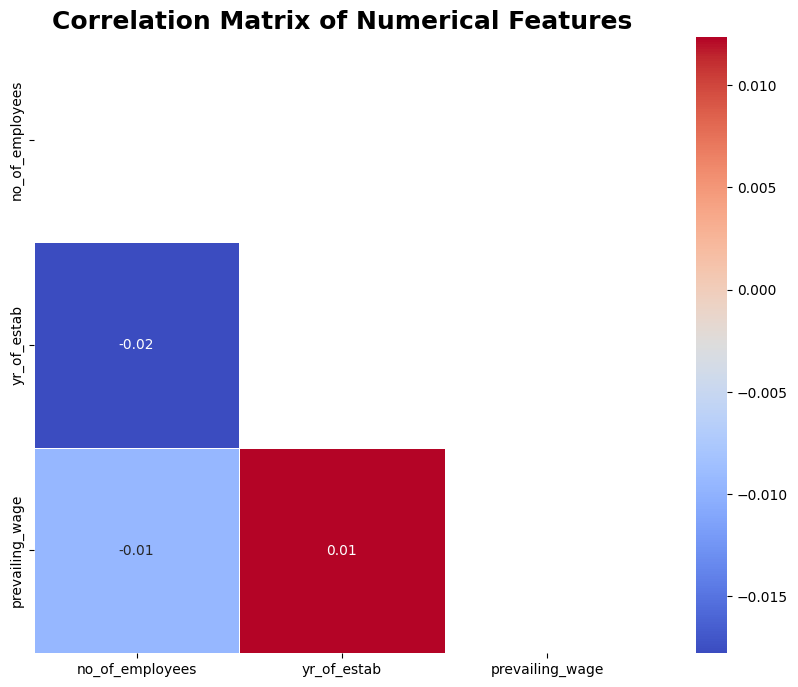

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix for numerical features
correlation_matrix = df[numeric_features].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold')

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True,
            linewidths=0.5, mask=np.triu(correlation_matrix))  # Mask upper triangle for cleaner plot
plt.show()


## Correlation Matrix of Numerical Features

The correlation matrix above represents the relationships between numerical features in the dataset. Each cell shows the correlation coefficient between two features, ranging from -1 to 1:

- **Values close to 1 or -1** indicate a strong positive or negative correlation, respectively.
- **Values near 0** suggest little or no linear relationship between features.

In this case, the correlations between `no_of_employees`, `yr_of_estab`, and `prevailing_wage` are all close to zero, indicating minimal multicollinearity. This implies that each feature contributes independently to the model, reducing the risk of redundancy and enhancing the stability of predictions.

In [13]:
from scipy.stats import chi2_contingency
import pandas as pd

# Initialize a list to store the test results
chi2_test_results = []

# Perform chi-square test for each categorical feature
for feature in categorical_features:
    # Create a contingency table between target and feature
    contingency_table = pd.crosstab(df['case_status'], df[feature])
    # Calculate the p-value using chi-square test
    p_value = chi2_contingency(contingency_table)[1]
    # Determine hypothesis result based on p-value
    if p_value < 0.05:
        chi2_test_results.append('Reject Null Hypothesis (Correlated)')
    else:
        chi2_test_results.append('Fail to Reject Null Hypothesis (Independent)')

# Compile results into a DataFrame
result = pd.DataFrame({'Column': categorical_features, 'Hypothesis Result': chi2_test_results})
result


,Column,Hypothesis Result
0,continent,Reject Null Hypothesis (Correlated)
1,education_of_employee,Reject Null Hypothesis (Correlated)
2,has_job_experience,Reject Null Hypothesis (Correlated)
3,requires_job_training,Fail to Reject Null Hypothesis (Independent)
4,region_of_employment,Reject Null Hypothesis (Correlated)
5,unit_of_wage,Reject Null Hypothesis (Correlated)
6,full_time_position,Reject Null Hypothesis (Correlated)
7,case_status,Reject Null Hypothesis (Correlated)


## Report

The **chi-square test** results reveal the following insight:

- The feature `requires_job_training` **fails to reject the null hypothesis**, indicating that it **does not show a statistically significant correlation** with the target column, `case_status`. This implies that `requires_job_training` is likely independent of the target and may not be a strong predictor for visa approval or denial.

This information is useful for feature selection, as features with low correlation to the target variable can be considered for exclusion or given lower priority during model training.

In [14]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [15]:
# Identify continuous features based on the number of unique values
continuous_features = [feature for feature in numeric_features if df[feature].nunique() >= 10]

# Display the number of continuous features and the list of them
print(f'Number of continuous features: {len(continuous_features)}')
print('Continuous features:', continuous_features)


Number of continuous features: 3
Continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


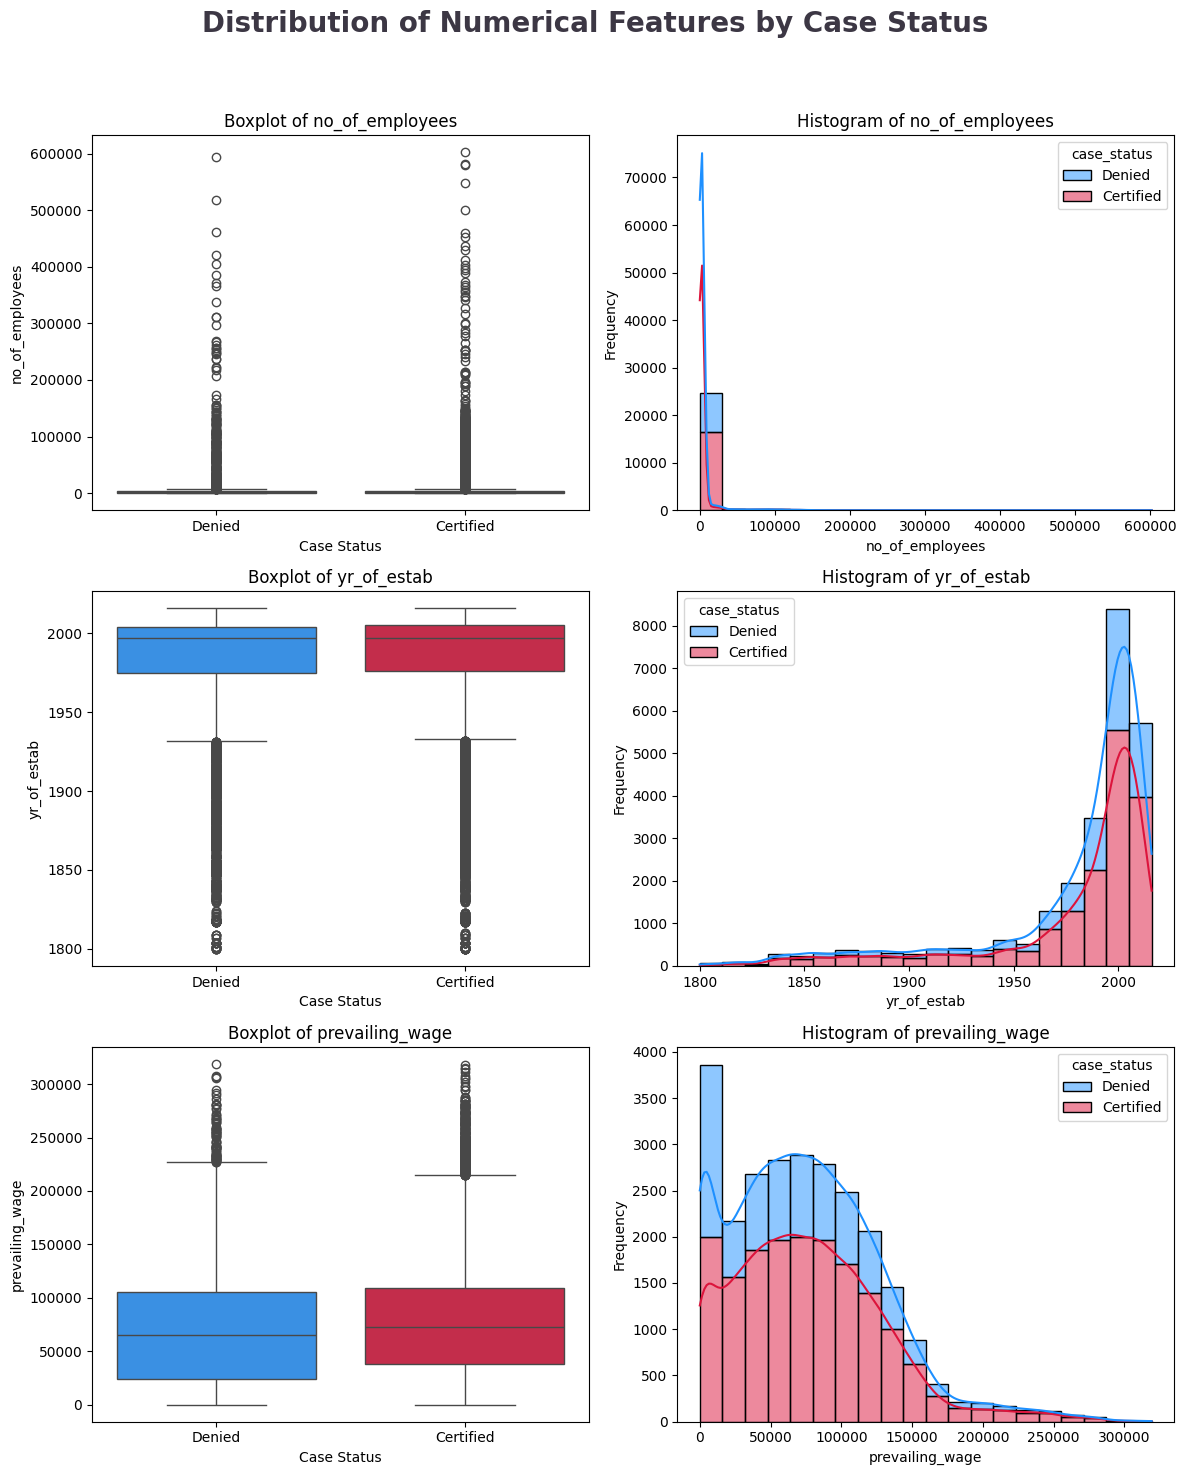

In [16]:
# Color palette for plotting
clr1 = ['#1E90FF', '#DC143C']

# Set up figure for distribution plots of numerical features by case status
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(12, 15))
fig.suptitle('Distribution of Numerical Features by Case Status', color='#3C3744', fontsize=20, fontweight='bold')

# Iterate through continuous features to create boxplot and histogram side-by-side
for i, col in enumerate(continuous_features):   
    # Boxplot
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    ax[i, 0].set_xlabel('Case Status')
    ax[i, 0].set_ylabel(col)
    
    # Histogram
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)
    ax[i, 1].set_xlabel(col)
    ax[i, 1].set_ylabel('Frequency')

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Reserve space for the main title
# Optional: Save plot
# plt.savefig('images/multivariate_num.png', bbox_inches='tight')



## Initial Analysis Report

- **no_of_employees**: This feature exhibits many outliers and a right-skewed distribution. These outliers can be addressed during feature engineering to reduce their impact.
  
- **yr_of_estab**: This feature is left-skewed with some outliers below the lower bound, as seen in the box plot. Handling these outliers may improve model performance.
  
- **prevailing_wage**: The prevailing wage is right-skewed with outliers above the upper bound. These outliers may need to be managed during data preprocessing to avoid potential distortion in predictions.
  
- **Missing Values**: There are no missing values in the dataset, simplifying the data cleaning process.

- **case_id**: This column contains unique values for each row and does not add analytical value, so it can be removed.

- **case_status**: This is the target variable that we aim to predict.

- **Categorical Features**: Categorical features can be encoded as binary numerical values, which will simplify their integration into the machine learning model.

This initial analysis informs the upcoming steps, including feature engineering, outlier handling, and encoding strategies, to prepare the data for model training.

# 4 Visualization

## 4.1 Visualize the Target Feature

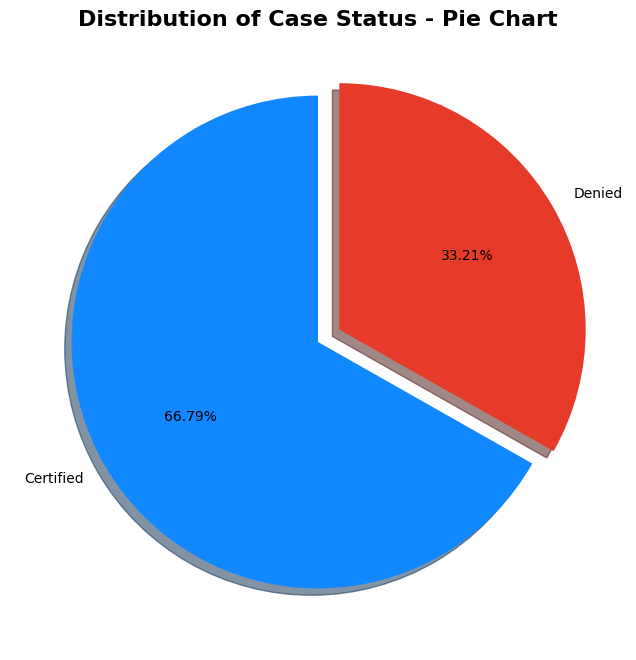

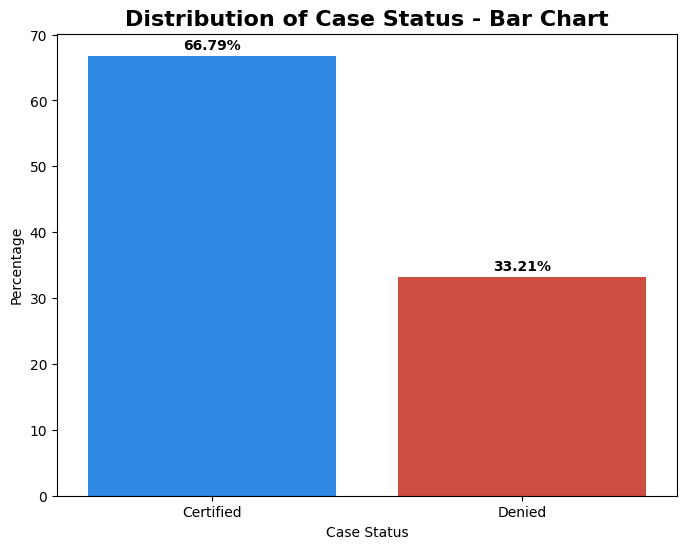

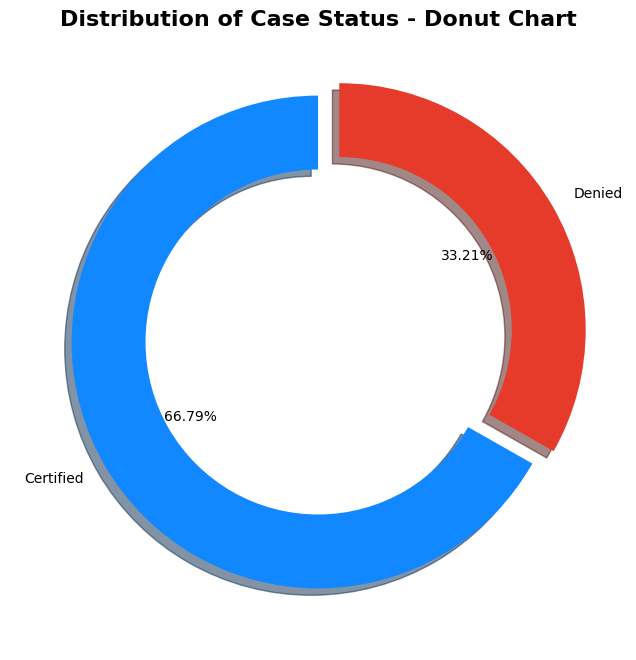

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage distribution of case_status
percentage = df['case_status'].value_counts(normalize=True) * 100
labels = ["Certified", "Denied"]

# Colors for plots
colors = ['#1188ff', '#e63a2a']
explode = (0, 0.1)

# 1. Pie Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
ax.set_title('Distribution of Case Status - Pie Chart', fontsize=16, fontweight='bold')
plt.show()

# 2. Bar Chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=labels, y=percentage.values, palette=colors)
ax.set_title('Distribution of Case Status - Bar Chart', fontsize=16, fontweight='bold')
ax.set_xlabel('Case Status')
ax.set_ylabel('Percentage')
for i, v in enumerate(percentage.values):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()

# 3. Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors, wedgeprops=dict(width=0.3))
ax.set_title('Distribution of Case Status - Donut Chart', fontsize=16, fontweight='bold')
plt.show()


### Imbalanced Data Explanation

Imbalanced data refers to a dataset where the classes in the target variable are not represented equally. In other words, one class has a significantly higher number of observations than the other(s). This can lead to challenges in building an accurate model, as the model may become biased towards the majority class and perform poorly in predicting the minority class.

### Example from Our Dataset

In the given dataset, the target variable `case_status` is imbalanced, with the `Denied` class having a higher count than the `Certified` class. This imbalance can lead to a model that predominantly predicts `Denied`, potentially missing out on accurately predicting `Certified` cases.

### Why Imbalanced Data Matters

- **Model Bias**: Standard machine learning algorithms tend to favor the majority class, which may result in poor performance on the minority class.
- **Metric Limitations**: Accuracy alone may not be a reliable metric for imbalanced data, as a model that predicts only the majority class can still achieve high accuracy but fails to provide meaningful predictions for the minority class.
- **Business Impact**: In real-world applications, misclassifying minority instances could have significant consequences, especially in cases like fraud detection, medical diagnoses, or visa approval.

## 4.2 Does applicant Continent has any impact on Visa status ?

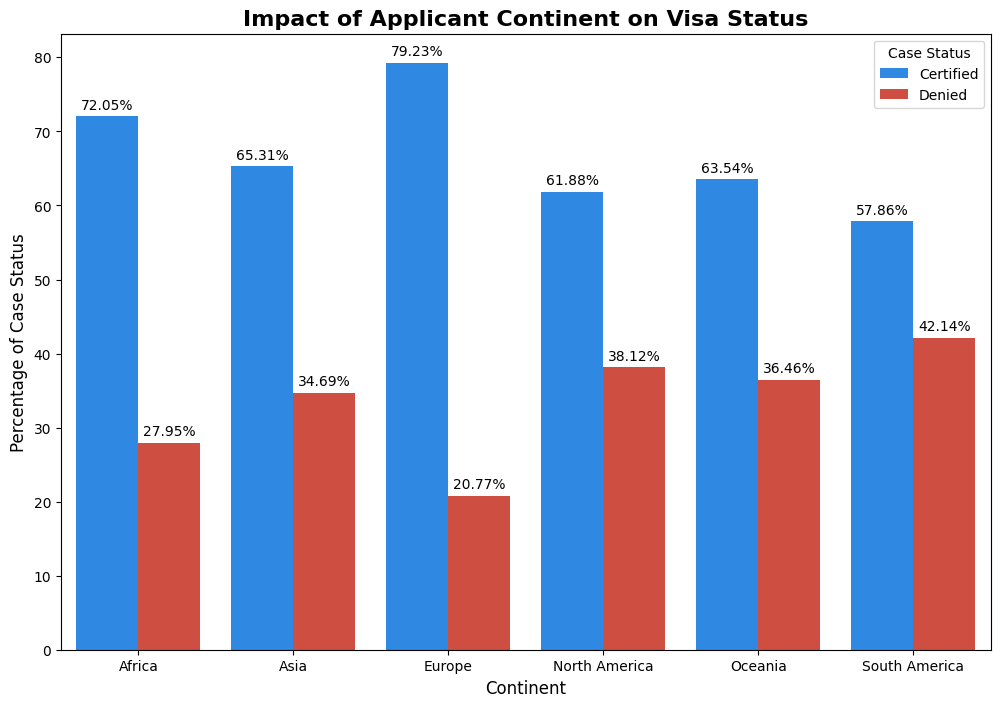

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of each case status per continent
continent_status_pct = (
    df.groupby('continent')['case_status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)

# Plot setup
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=continent_status_pct, x='continent', y='percentage', hue='case_status', palette=['#1188ff', '#e63a2a'])

# Titles and labels
plt.title('Impact of Applicant Continent on Visa Status', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Percentage of Case Status', fontsize=12)
plt.legend(title='Case Status')

# Add percentage labels to bars
barplot.bar_label(barplot.containers[0], fmt='%.2f%%', padding=3)
barplot.bar_label(barplot.containers[1], fmt='%.2f%%', padding=3)

# Show plot
plt.show()


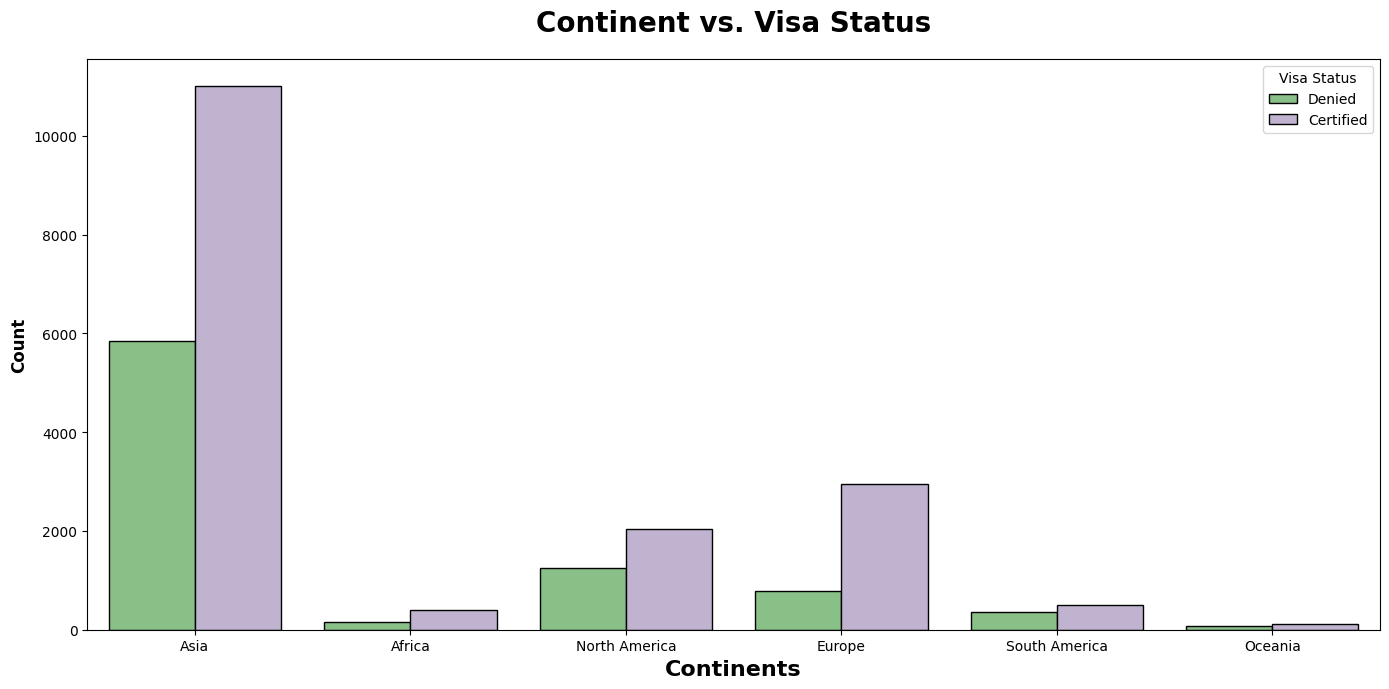

In [19]:
# Plotting continent vs. visa status with a count plot
plt.figure(figsize=(14, 7))
sns.countplot(x="continent", hue="case_status", data=df, edgecolor="black", palette="Accent")

# Titles and labels
plt.title("Continent vs. Visa Status", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Continents", fontsize=16, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.legend(title="Visa Status", fancybox=True)

# Show plot
plt.tight_layout()
plt.show()


In [20]:
df2 = df.copy()

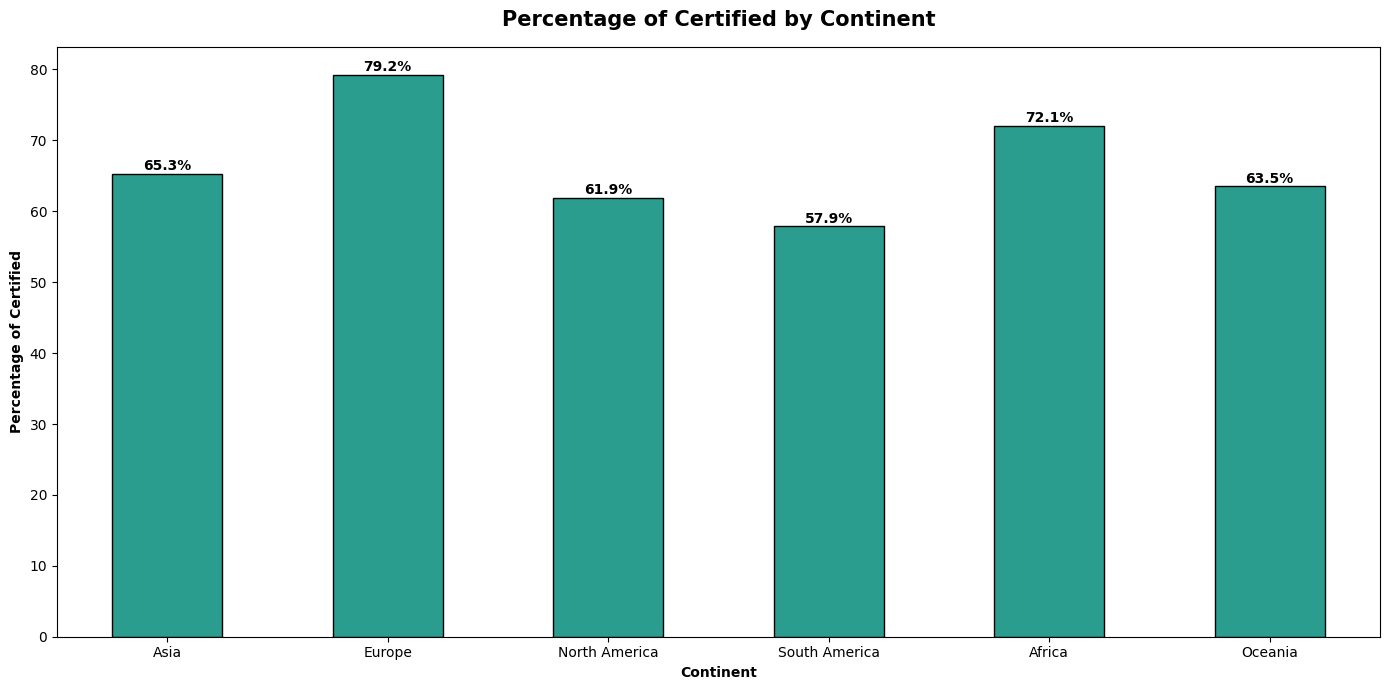

In [21]:
import matplotlib.pyplot as plt

# Set up figure size
plt.figure(figsize=(14, 7))

# Calculate percentage of Certified by continent
certified_pct = (
    100 * df2[df2["case_status"] == 'Certified']["continent"].value_counts() / df2["continent"].value_counts()
)

# Plotting
certified_pct.plot(kind='bar', color='#2a9d8f', edgecolor='black')
plt.title("Percentage of Certified by Continent", fontsize=15, fontweight='bold', pad=15)

# Annotate bars with percentage values
for idx, value in enumerate(certified_pct):
    plt.text(idx, value + 0.5, f'{value:.1f}%', ha='center', fontweight='bold')

# Axis labels and layout
plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Percentage of Certified', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Report

- **Asia**: The chart indicates that applicants from Asia make up the largest portion of visa applications. Notably, **43% of all Certified applications** are from Asia, highlighting a significant representation from this continent.

- **Europe**: Following Asia, **Europe accounts for 11% of Certified applications**. This suggests a moderate level of application success for European applicants.

- **Certification Probability**: Applicants from **Europe have the highest chance of getting certified**, followed closely by those from **Africa**. This trend may indicate favorable outcomes for applicants from these regions relative to others.

This data provides valuable insights into the regional distribution and success rates of visa applications, with Asia dominating in volume and Europe and Africa showing higher certification success rates.

## 4.3 Does applicant education has any impact on Visa status ?

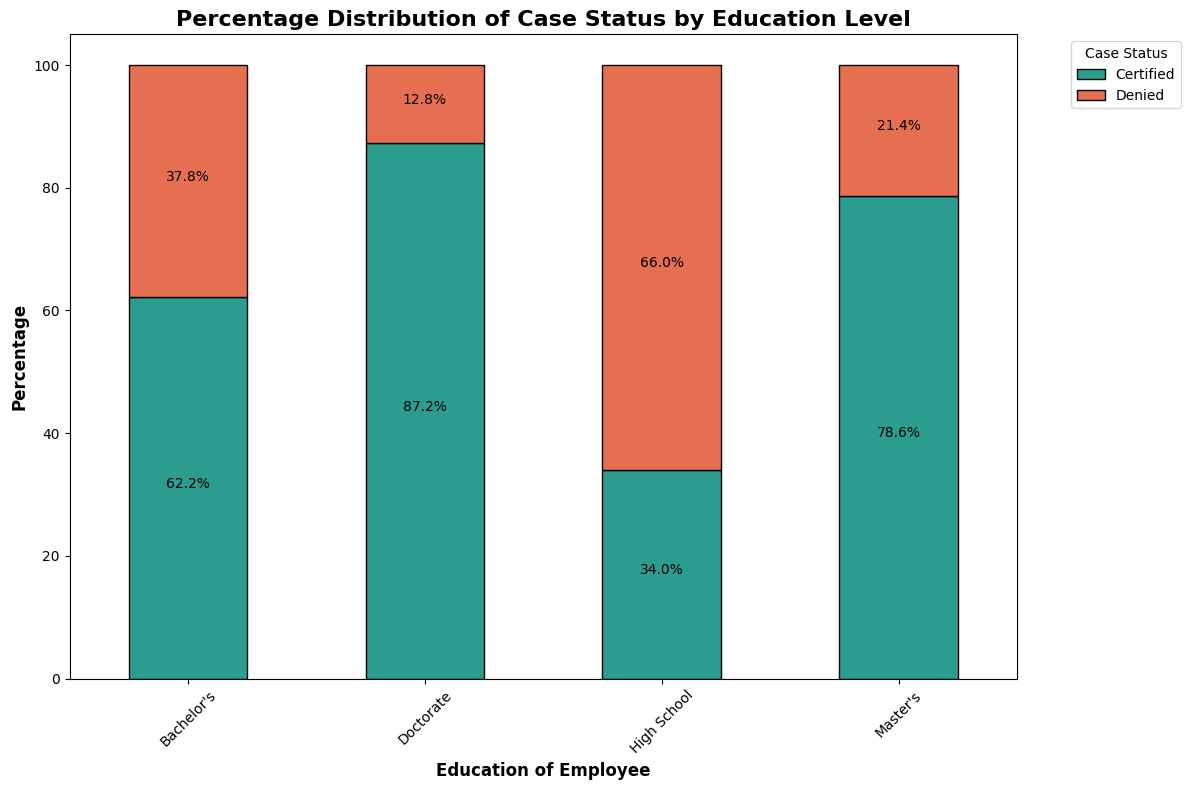

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentage of each case_status within each education level
education_status_pct = (
    df.groupby('education_of_employee')['case_status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)

# Pivot data to make it suitable for a stacked bar plot
education_status_pivot = education_status_pct.pivot(index='education_of_employee', columns='case_status', values='percentage')

# Plotting
ax = education_status_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#2a9d8f', '#e76f51'], edgecolor='black')
plt.title("Percentage Distribution of Case Status by Education Level", fontsize=16, fontweight='bold')
plt.xlabel("Education of Employee", fontsize=12, fontweight='bold')
plt.ylabel("Percentage", fontsize=12, fontweight='bold')
plt.legend(title="Case Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Add percentage annotations to each bar segment
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='center', fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


### Insights

- **Impact of Education Level**: Education level shows a strong influence on visa status, with higher educational qualifications generally leading to a higher likelihood of certification.
  
- **Higher Acceptance for Advanced Degrees**: Applicants with **Doctorate and Master's degrees** have a notably higher chance of being certified compared to those with lower educational qualifications. This suggests that advanced degrees may positively impact the success of visa applications.

These insights highlight the importance of educational qualifications in influencing visa approval outcomes, especially for applicants with advanced degrees.

## 4.4 Does applicant's previous work experience has any impact on Visa status ?

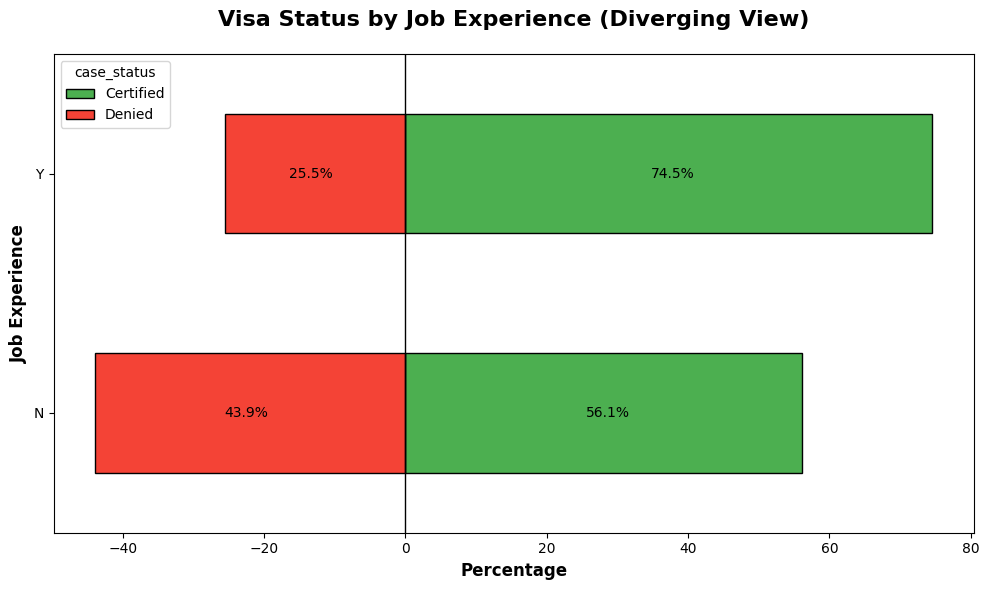

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate percentage of each case_status within has_job_experience
experience_status_pct = (
    df.groupby('has_job_experience')['case_status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)

# Pivot data to prepare for diverging bar plot
experience_status_pivot = experience_status_pct.pivot(index='has_job_experience', columns='case_status', values='percentage').fillna(0)

# Create a new column where 'Denied' percentages are negative for diverging effect
experience_status_pivot['Denied'] = -experience_status_pivot['Denied']

# Plotting the Diverging Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
experience_status_pivot[['Certified', 'Denied']].plot(kind='barh', stacked=True, color=['#4caf50', '#f44336'], edgecolor='black', ax=ax)

# Titles and labels
plt.title("Visa Status by Job Experience (Diverging View)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Percentage", fontsize=12, fontweight='bold')
plt.ylabel("Job Experience", fontsize=12, fontweight='bold')
plt.axvline(0, color='black', linewidth=1)

# Adding percentage labels inside each bar
for container in ax.containers:
    ax.bar_label(container, labels=[f'{abs(v):.1f}%' for v in container.datavalues], label_type='center', padding=3)

plt.tight_layout()
plt.show()


### Report

- **Impact of Work Experience on Visa Status**: 
  - **With Work Experience**: Among applicants with prior work experience, **74.5% have been certified**, while **only 25.5% have been denied**. 
  - **Without Work Experience**: For applicants without work experience, **56% were certified** and **43% were denied**.

- **Conclusion**: These results suggest that work experience does positively influence visa status, providing a slight advantage for experienced applicants. However, the difference is not substantial, indicating that while experience is beneficial, it is not a decisive factor.

## 4.5 If the Employee requires job training, does it make any impact on visa status?

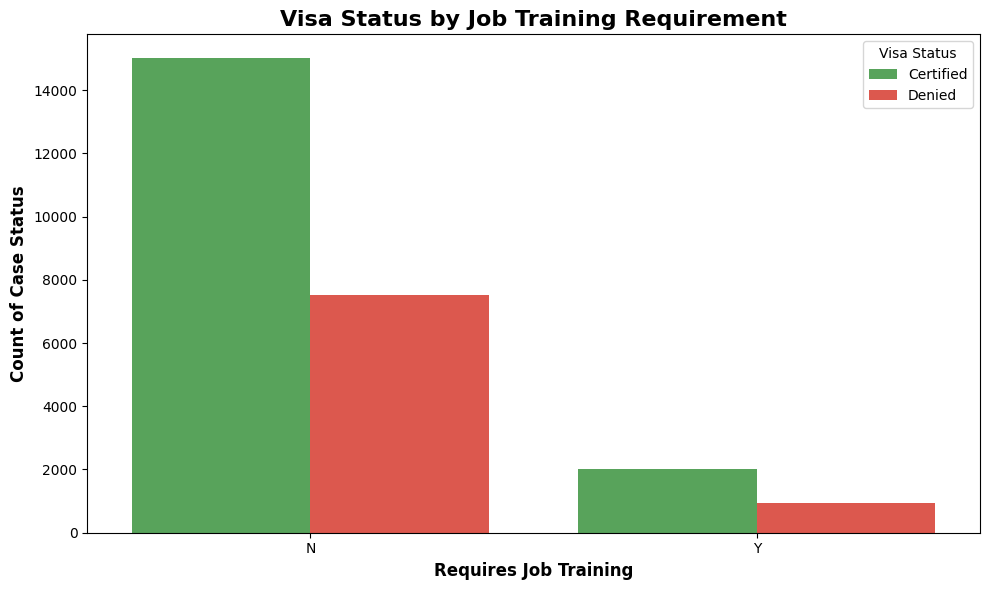

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
training_status = (
    df.groupby(['requires_job_training', 'case_status'])
    .size()
    .reset_index(name='count')
)

# Plotting a clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=training_status, x='requires_job_training', y='count', hue='case_status', palette=['#4caf50', '#f44336'])

# Formatting
plt.title("Visa Status by Job Training Requirement", fontsize=16, fontweight='bold')
plt.xlabel("Requires Job Training", fontsize=12, fontweight='bold')
plt.ylabel("Count of Case Status", fontsize=12, fontweight='bold')
plt.legend(title="Visa Status")

plt.tight_layout()
plt.show()


## 4.6 Does Number of employees of employer has any impact on Visa status?

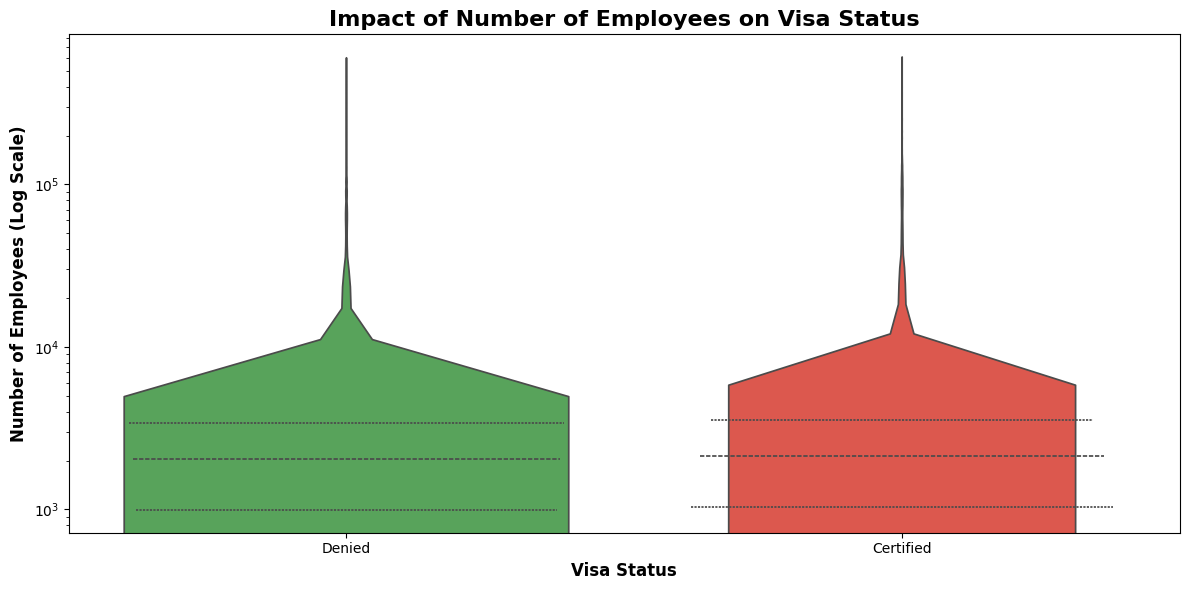

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='case_status', y='no_of_employees', palette=['#4caf50', '#f44336'], inner='quartile')

# Formatting the plot
plt.title("Impact of Number of Employees on Visa Status", fontsize=16, fontweight='bold')
plt.xlabel("Visa Status", fontsize=12, fontweight='bold')
plt.ylabel("Number of Employees (Log Scale)", fontsize=12, fontweight='bold')
plt.yscale("log")  # Apply log scale for better visualization if there are large values

plt.tight_layout()
plt.show()


## 4.7 Wages and its impact on Visa status

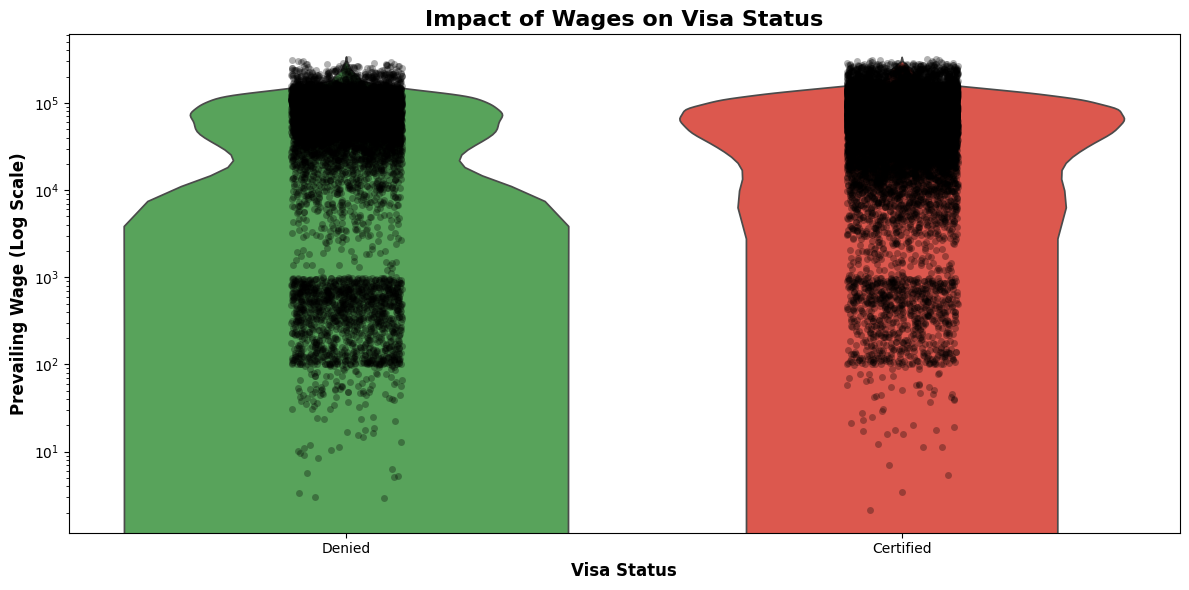

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(12, 6))

# Violin plot for the distribution
sns.violinplot(data=df, x='case_status', y='prevailing_wage', palette=['#4caf50', '#f44336'], inner=None)

# Overlay with a strip plot for individual points
sns.stripplot(data=df, x='case_status', y='prevailing_wage', color='black', alpha=0.3, jitter=True)

# Formatting the plot
plt.title("Impact of Wages on Visa Status", fontsize=16, fontweight='bold')
plt.xlabel("Visa Status", fontsize=12, fontweight='bold')
plt.ylabel("Prevailing Wage (Log Scale)", fontsize=12, fontweight='bold')
plt.yscale("log")  # Use a log scale for better visualization with varying wage values

plt.tight_layout()
plt.show()


### Analysis: Impact of Wages on Visa Status

The **violin plot** combined with a **strip plot** above shows the distribution of prevailing wages for `Denied` and `Certified` visa applications:

- **Distribution Shape**: Both `Denied` and `Certified` groups have a similar wage distribution shape, indicating that wage levels are not drastically different across these categories.
- **Central Clustering**: Most wages cluster between 10^3 and 10^5 (in log scale) for both statuses, suggesting that the majority of applicants earn wages within this range.
- **Minor Differences**: There is no strong visual distinction in wage distribution between `Denied` and `Certified` statuses, indicating that wages alone may not be a significant factor in determining visa approval. 

This plot provides a quick, visual understanding of how wages relate to visa status.

## 4.7 Does Region of employment has impact on Visa status ?

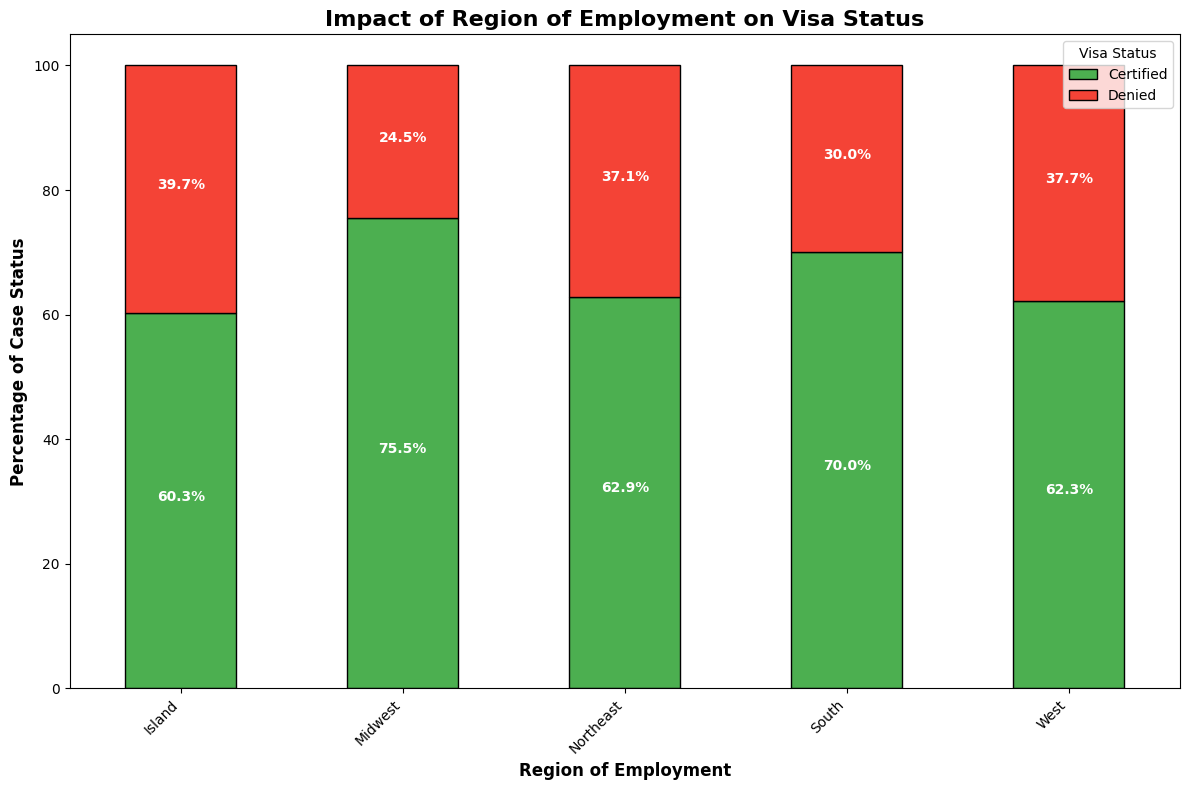

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of each case_status within each region_of_employment
region_status_pct = (
    df.groupby('region_of_employment')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

# Plotting a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
region_status_pct.plot(kind='bar', stacked=True, color=['#4caf50', '#f44336'], ax=ax, edgecolor='black')

# Formatting the plot
plt.title("Impact of Region of Employment on Visa Status", fontsize=16, fontweight='bold')
plt.xlabel("Region of Employment", fontsize=12, fontweight='bold')
plt.ylabel("Percentage of Case Status", fontsize=12, fontweight='bold')
plt.legend(title="Visa Status", loc='upper right')

# Display percentages on bars
for i, region in enumerate(region_status_pct.index):
    for j, (case_status, pct) in enumerate(region_status_pct.loc[region].items()):
        ax.text(i, region_status_pct.loc[region][:j].sum() + pct / 2, f'{pct:.1f}%', ha='center', color='white', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Report

* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for midwest followed by South region

## 4.8 Does Prevailing wage has any impact on Visa status ?

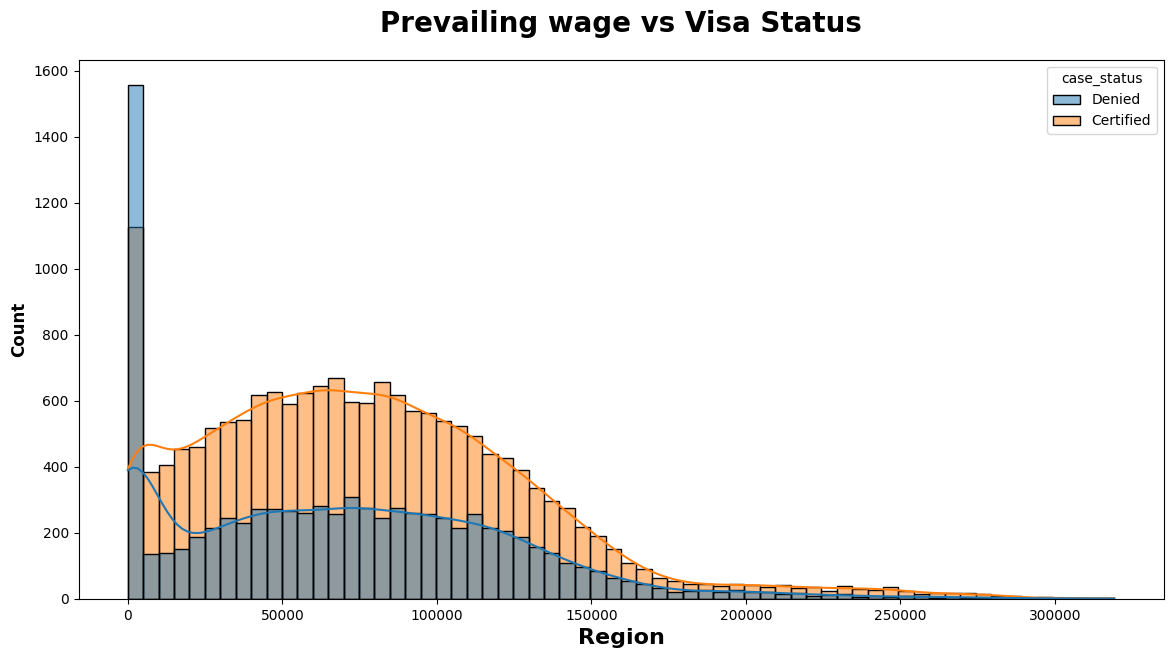

In [28]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

### Insights
* The distribution of both the classes are same but need to handel the outliers.

## 4.9 Prevailing wage based on Education

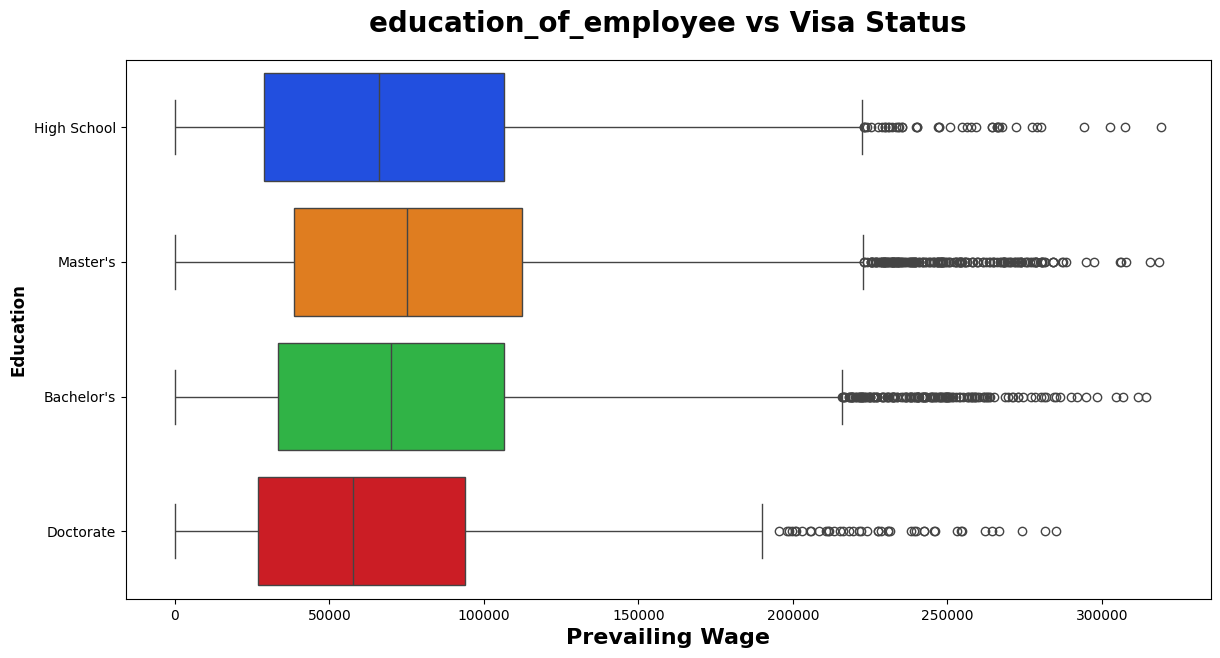

In [29]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

### Report

* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

## 4.10 Prevailing wage based on Job experience

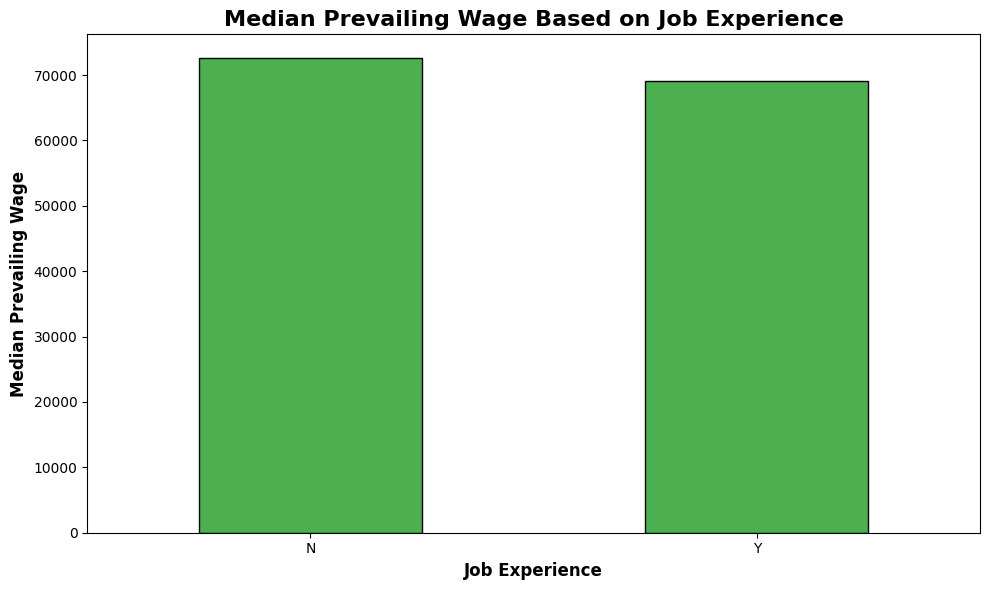

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the median prevailing wage based on job experience
median_wage_experience = df.groupby('has_job_experience')['prevailing_wage'].median().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
median_wage_experience.plot(kind='bar', color='#4caf50', edgecolor='black')

# Formatting the plot
plt.title("Median Prevailing Wage Based on Job Experience", fontsize=16, fontweight='bold')
plt.xlabel("Job Experience", fontsize=12, fontweight='bold')
plt.ylabel("Median Prevailing Wage", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


## 4.10 Prevailing wage based on Continent

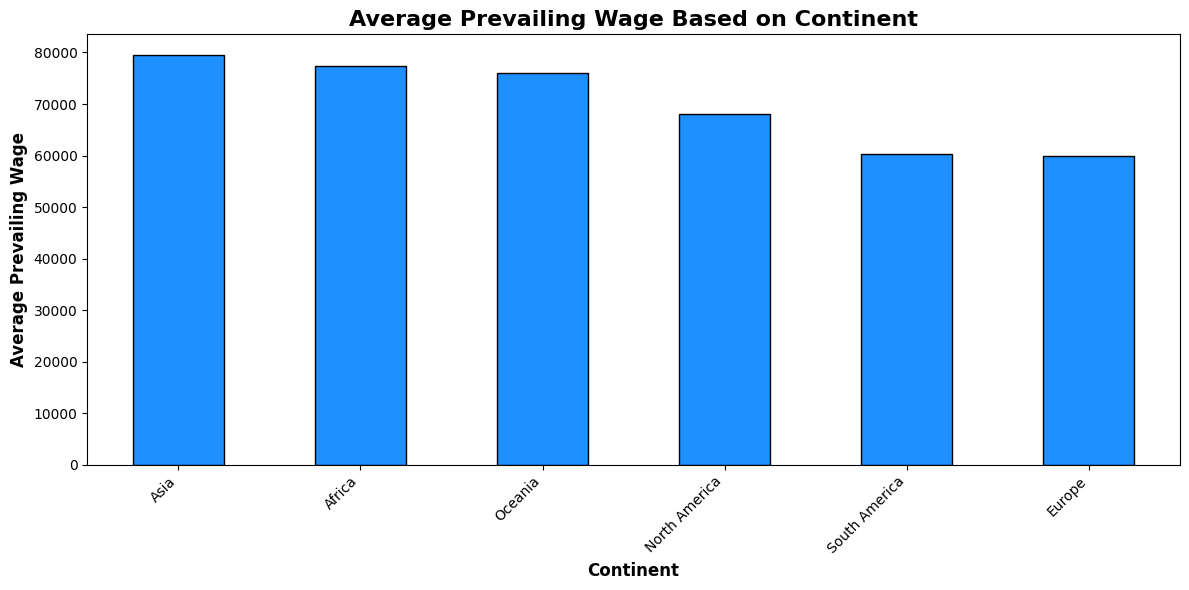

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average prevailing wage based on continent
average_wage_continent = df.groupby('continent')['prevailing_wage'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
average_wage_continent.plot(kind='bar', color='#1E90FF', edgecolor='black')

# Formatting the plot
plt.title("Average Prevailing Wage Based on Continent", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=12, fontweight='bold')
plt.ylabel("Average Prevailing Wage", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


## 4.11 Year of Establishment

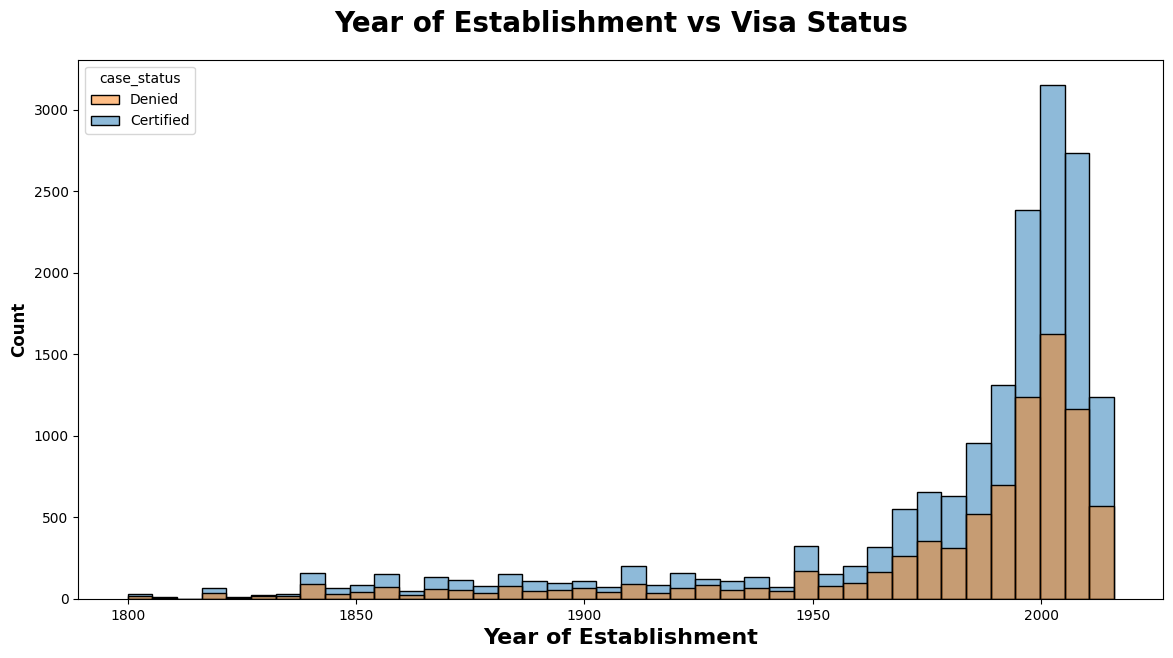

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.subplots(figsize=(14, 7))
sns.histplot(x="yr_of_estab", data=df, bins=40, hue='case_status', 
             palette={'Certified': '#1f77b4', 'Denied': '#ff7f0e'})  # Custom colors for each case status

# Formatting the plot
plt.title("Year of Establishment vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Year of Establishment", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)  # Changed to "Count" for better accuracy

# Display the plot
plt.show()


### Report

#### Observations on Company Establishment
- **Binning Analysis**: Each bin represents a span of 5 years. 
- **Establishment Trends**: A significant number of companies were established after the year 2000, with the highest concentration of establishments occurring between **2000 and 2005**

## Final Recommendations
1. **Column Removals**:
   - **case_id**: This column can be dropped from the dataset as it serves merely as an identifier and does not contribute to predictive modeling.
   - **requires_job_training**: This column can also be removed, as visualizations and the chi-squared test have shown it does not significantly impact the target variable.

2. **Outlier Management**:
   - **no_of_employees** and **prevailing_wage**: Both columns exhibit outliers that should be addressed during the data preprocessing stage to improve model performance and accuracy.

3. **Continent Column**:
   - The **continent** column contains several unique values with very few counts. To streamline the dataset, these can be combined into an "Others" category.

4. **Class Imbalance**:
   - The target column, **case_status**, is imbalanced, which may lead to biased model predictions. Strategies such as resampling, synthetic data generation, or adjusting class weights should be considered before model building.

This report provides a comprehensive overview of data quality and the necessary steps to prepare the dataset for effective modeling, ensuring robust and reliable outcomes in predicting visa status.